In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import geopandas as gpd
import folium
from folium import plugins

In [2]:
pd.set_option('display.max_column', 200)
#pd.set_option('display.width', 50)

In [3]:
airbnb = pd.read_csv('data/sf_airbnb listings.csv')

In [4]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,2.019060e+13,6/2/19,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,7/31/08,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1,1,"[''''email'''', ''''phone'''', ''''facebook'''...",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,1,1,30,30,1.0,30.0,2 months ago,t,1,3,7,92,6/2/19,192,56,7/23/09,5/16/19,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,{SAN FRANCISCO},t,f,moderate,f,f,1,1,0,0,1.60
1,5858,https://www.airbnb.com/rooms/5858,2.019060e+13,6/2/19,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,NaN,https://a0.muscache.com/im/pictures/17714/3a7a...,NaN,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,3/2/09,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_..

In [5]:
airbnb.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.575000e+03,7.575000e+03,0.0,0.0,0.0,7.575000e+03,0.0,7575.000000,7575.000000,0.0,7575.000000,7575.000000,7575.000000,7557.000000,7573.000000,7568.000000,130.000000,7575.000000,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7.575000e+03,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,6038.000000,6034.000000,6035.000000,6033.000000,6036.000000,6033.000000,6033.000000,7575.000000,7575.000000,7575.000000,7575.000000,6081.000000
mean,1.809650e+07,2.019060e+13,NaN,NaN,NaN,5.200379e+07,NaN,68.810957,68.810957,NaN,37.765838,-122.430278,3.213993,1.348353,1.352172,1.784752,1057.023077,1.735842,1.321773e+04,1.374270e+04,1.321756e+04,1.324513e+04,1.371885e+04,1.374566e+04,1.322917e+04,1.373017e+04,6.470495,16.374389,29.202772,146.523828,44.269175,14.376370,95.637463,9.776268,9.631152,9.862921,9.840954,9.679430,9.419194,20.716436,17.181782,3.003564,0.531089,1.876966
std,1.117422e+07,0.000000e+00,NaN,NaN,NaN,6.879887e+07,NaN,235.171339,235.171339,NaN,0.022747,0.026779,1.928827,0.811569,0.936984,1.184475,832.036825,1.361821,1.148970e+06,1.148964e+06,1.148970e+06,1.148970e+06,1.148965e+06,1.148964e+06,1.148970e+06,1.148965e+06,8.981623,19.219420,29.176861,125.305320,74.789057,22.516496,6.985816,0.680768,0.767346,0.529882,0.585565,0.697668,0.798795,51.741641,50.247190,7.185193,2.977967,2.038962
min,9.580000e+02,2.019060e+13,NaN,NaN,NaN,4.600000e+01,NaN,0.000000,0.000000,NaN,37.704170,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,7.749788e+06,2.019060e+13,NaN,NaN,NaN,4.060742e+06,NaN,1.000000,1.000000,NaN,37.751075,-122.442910,2.000000,1.000000,1.000000,1.000000,500.000000,1.000000,2.000000e+00,2.900000e+01,2.000000e+00,2.000000e+00,2.800000e+01,2.900000e+01,2.000000e+00,2.900000e+01,0.000000,0.000000,2.000000,24.000000,1.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.320000
50%,1.941397e+07,2.019060e+13,NaN,NaN,NaN,1.875693e+07,NaN,2.000000,2.000000,NaN,37.767670,-122.424930,2.000000,1.000000,1.000000,1.000000,871.500000,1.000000,4.000000e+00,1.800000e+02,4.000000e+00,4.000000e+00,1.800000e+02,1.800000e+02,4.000000e+00,1.800000e+02,2.000000,8.000000,20.000000,119.000000,11.000000,3.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.070000
75%,2.824180e+07,2.019060e+13,NaN,NaN,NaN,7.437275e+07,NaN,10.000000,10.000000,NaN,37.785400,-122.410890,4.000000,1.500000,2.000000,2.000000,1500.000000,2.000000,3.000000e+01,1.125000e+03,3.000000e+01,3.000000e+01,1.125000e+03,1.125000e+03,3.000000e+01,1.125000e+03,10.000000,29.000000,52.000000,275.000000,55.000000,20.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,2.000000,2.000000,0.000000,2.830000
max,3.529191e+07,2.019060e+13,N

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7575 entries, 0 to 7574
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(22), object(62)
memory usage: 6.1+ MB


In [7]:
airbnb = airbnb.drop(['scrape_id', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'experiences_offered', 'last_scraped', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood_group_cleansed', 'market', 'country_code', 'is_location_exact', 'jurisdiction_names', 'calendar_last_scraped', 'license', 'host_verifications', 'host_has_profile_pic', 'street', 'host_location', 'host_neighbourhood', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1)

In [8]:
airbnb.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,smart_location,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,7/31/08,We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,t,1,1,t,Lower Haight,Western Addition,San Francisco,CA,94117,"San Francisco, CA",United States,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,2 months ago,t,1,3,7,92,192,56,7/23/09,5/16/19,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,t,f,moderate,f,f,1,1,0,0,1.60
1,5858,https://www.airbnb.com/rooms/5858,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",8904,Philip And Tania,3/2/09,Philip: English transplant to the Bay Area and...,within a day,100%,f,2,2,t,Bernal Heights,Bernal Heights,San Francisco,CA,94110,"San Francisco, CA",United States,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,Family/kid frie...",NaN,$235.00,"$1,600.00","$5,500.00",NaN,$100.00,2,$0.00,3 days ago,t,0,0,0,0,111,0,5/3/09,8/6/17,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90
2,7918,https://www.airbnb.com/rooms/7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",Please email your picture id with print name (...,N Juda Muni and bus stop. Street parking.,NaN,NaN,"No party, No smoking, not for any kinds of smo...",21994,Aaron,6/17/09,7 minutes walk to UCSF. 15 minutes walk to US...,within a few hours,100%,f,10,10,t,Cole Valley,Haight Ashbury,San Francisco,CA,94117,"San Francisco, CA",United States,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",NaN,$65.00,$485.00,"$1,685.00",$200.00,$50.00,1,$12.00,19 months ago,t,30,60,90,365,17,0,8/31/09,11/21/16,85.0,8.0,8.0,

In [9]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7575 entries, 0 to 7574
Data columns (total 75 columns):
id                                              7575 non-null int64
listing_url                                     7575 non-null object
name                                            7574 non-null object
summary                                         7372 non-null object
space                                           6295 non-null object
description                                     7551 non-null object
neighborhood_overview                           5575 non-null object
notes                                           4684 non-null object
transit                                         5234 non-null object
access                                          4911 non-null object
interaction                                     5012 non-null object
house_rules                                     5160 non-null object
host_id                                         7575 non-null int6

In [10]:
airbnb['is_business_travel_ready'].unique().shape

(1,)

In [11]:
airbnb['neighbourhood_cleansed'].unique()

array(['Western Addition', 'Bernal Heights', 'Haight Ashbury', 'Mission',
       'Potrero Hill', 'Downtown/Civic Center', 'Castro/Upper Market',
       'Inner Sunset', 'South of Market', 'Noe Valley', 'Nob Hill',
       'Outer Richmond', 'Presidio Heights', 'Glen Park', 'Ocean View',
       'Pacific Heights', 'Financial District', 'Twin Peaks',
       'Russian Hill', 'Outer Sunset', 'Marina', 'Inner Richmond',
       'Excelsior', 'Seacliff', 'Chinatown', 'West of Twin Peaks',
       'Bayview', 'North Beach', 'Diamond Heights', 'Outer Mission',
       'Parkside', 'Lakeshore', 'Crocker Amazon', 'Golden Gate Park',
       'Visitacion Valley', 'Presidio'], dtype=object)

In [12]:
airbnb['neighbourhood'].unique()

array(['Lower Haight', 'Bernal Heights', 'Cole Valley', 'Alamo Square',
       'Western Addition/NOPA', 'Mission District', 'Potrero Hill',
       'Hayes Valley', 'Union Square', 'Haight-Ashbury', 'The Castro',
       'South Beach', 'Noe Valley', 'Nob Hill', 'Richmond District',
       'Presidio Heights', 'Glen Park', 'Dogpatch', 'Ingleside',
       'Pacific Heights', 'SoMa', 'Financial District', 'Twin Peaks',
       'Inner Sunset', 'Russian Hill', 'Outer Sunset', 'Marina',
       'Excelsior', 'Chinatown', 'Civic Center', 'Tenderloin',
       'Balboa Terrace', 'Bayview', 'Telegraph Hill', 'Diamond Heights',
       'Duboce Triangle', 'West Portal', 'North Beach', 'Mission Terrace',
       'Sunnyside', 'Cow Hollow', "Fisherman''''s Wharf", 'Lakeshore',
       "Fisherman''s Wharf", 'Crocker Amazon', 'Downtown', 'Oceanview',
       'Portola', 'Parkside', 'Presidio', 'Forest Hill',
       'Visitacion Valley', 'Mission Bay', 'Sea Cliff', 'Daly City',
       'Japantown'], dtype=object)

In [13]:
airbnb['price'] = airbnb['price'].str.replace(' ', '')
airbnb['price'] = airbnb['price'].str.replace(',', '')
airbnb['weekly_price'] = airbnb['weekly_price'].str.replace(' ', '')
airbnb['weekly_price'] = airbnb['weekly_price'].str.replace(',', '')
airbnb['monthly_price'] = airbnb['monthly_price'].str.replace(' ', '')
airbnb['monthly_price'] = airbnb['monthly_price'].str.replace(',', '')

In [14]:
airbnb['price'] = airbnb['price'].str.replace('$', '')
airbnb['weekly_price'] = airbnb['weekly_price'].str.replace('$', '')
airbnb['monthly_price'] = airbnb['monthly_price'].str.replace('$', '')

In [15]:
airbnb['price'] = pd.to_numeric(airbnb['price'])

In [16]:
airbnb['weekly_price'] = pd.to_numeric(airbnb['weekly_price'])
airbnb['monthly_price'] = pd.to_numeric(airbnb['monthly_price'])

In [17]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7575 entries, 0 to 7574
Data columns (total 75 columns):
id                                              7575 non-null int64
listing_url                                     7575 non-null object
name                                            7574 non-null object
summary                                         7372 non-null object
space                                           6295 non-null object
description                                     7551 non-null object
neighborhood_overview                           5575 non-null object
notes                                           4684 non-null object
transit                                         5234 non-null object
access                                          4911 non-null object
interaction                                     5012 non-null object
house_rules                                     5160 non-null object
host_id                                         7575 non-null int6

In [18]:
price_per_neighbourhood = airbnb[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').mean().sort_values(['price'], ascending=False)
price_per_neighbourhood

,price
neighbourhood_cleansed,
Seacliff,552.880000
Presidio Heights,349.703704
Golden Gate Park,348.500000
Russian Hill,337.318182
Marina,323.726316
Pacific Heights,309.602564
Western Addition,252.301347
North Beach,251.723270
Castro/Upper Market,248.113744


In [19]:
listing_count = airbnb.neighbourhood_cleansed.value_counts()
listing_count

Mission                  730
Downtown/Civic Center    628
South of Market          614
Western Addition         594
Castro/Upper Market      422
Bernal Heights           406
Haight Ashbury           379
Noe Valley               325
Outer Sunset             277
Nob Hill                 246
Potrero Hill             232
Marina                   190
Inner Richmond           181
Russian Hill             176
Bayview                  171
Outer Mission            164
Inner Sunset             161
Excelsior                160
North Beach              159
Outer Richmond           158
Financial District       156
Pacific Heights          156
Parkside                 137
West of Twin Peaks       126
Chinatown                123
Ocean View               109
Visitacion Valley         72
Glen Park                 70
Twin Peaks                65
Lakeshore                 58
Crocker Amazon            55
Presidio Heights          27
Seacliff                  25
Diamond Heights           18
Golden Gate Pa

In [20]:
listing = pd.merge(price_per_neighbourhood, listing_count, left_index=True, right_index=True).rename(columns = {'price': 'price', 'neighbourhood_cleansed':'count'})
listing

,price,count
Seacliff,552.880000,25
Presidio Heights,349.703704,27
Golden Gate Park,348.500000,4
Russian Hill,337.318182,176
Marina,323.726316,190
Pacific Heights,309.602564,156
Western Addition,252.301347,594
North Beach,251.723270,159
Castro/Upper Market,248.113744,422
Potrero Hill,239.543103,232


In [21]:
df = airbnb[['host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'accommodates', 'bedrooms', 'beds', 'price', 'review_scores_rating']]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c956390>,
      dtype=object)

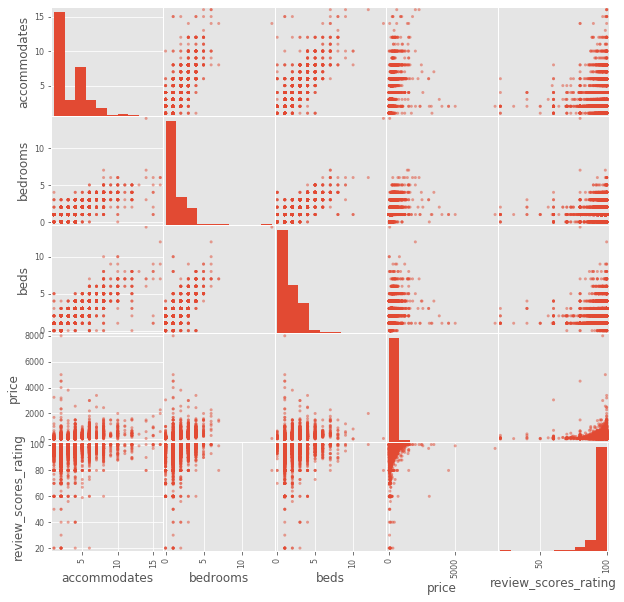

In [22]:
pd.plotting.scatter_matrix(df, figsize = (10,10))

In [23]:
airbnb['price_pp'] = airbnb['price']/airbnb['accommodates']
airbnb.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,smart_location,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_pp
0,958,https://www.airbnb.com/rooms/958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,7/31/08,We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,t,1,1,t,Lower Haight,Western Addition,San Francisco,CA,94117,"San Francisco, CA",United States,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",NaN,170.0,1120.0,4200.0,$100.00,$100.00,2,$25.00,2 months ago,t,1,3,7,92,192,56,7/23/09,5/16/19,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,t,f,moderate,f,f,1,1,0,0,1.60,56.666667
1,5858,https://www.airbnb.com/rooms/5858,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",8904,Philip And Tania,3/2/09,Philip: English transplant to the Bay Area and...,within a day,100%,f,2,2,t,Bernal Heights,Bernal Heights,San Francisco,CA,94110,"San Francisco, CA",United States,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,Family/kid frie...",NaN,235.0,1600.0,5500.0,NaN,$100.00,2,$0.00,3 days ago,t,0,0,0,0,111,0,5/3/09,8/6/17,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90,47.000000
2,7918,https://www.airbnb.com/rooms/7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",Please email your picture id with print name (...,N Juda Muni and bus stop. Street parking.,NaN,NaN,"No party, No smoking, not for any kinds of smo...",21994,Aaron,6/17/09,7 minutes walk to UCSF. 15 minutes walk to US...,within a few hours,100%,f,10,10,t,Cole Valley,Haight Ashbury,San Francisco,CA,94117,"San Francisco, CA",United States,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",NaN,65.0,485.0,1685.0,$200.00,$50.00,1,$12.00,19 months ago,t,30,60,90,365,17,0,8/31/09,11/21/16,85.0,8.0,8.0,9.0,

In [24]:
airbnb['count'] = airbnb.neighbourhood_cleansed.value_counts()
airbnb.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,smart_location,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_pp,count
0,958,https://www.airbnb.com/rooms/958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,7/31/08,We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,t,1,1,t,Lower Haight,Western Addition,San Francisco,CA,94117,"San Francisco, CA",United States,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",NaN,170.0,1120.0,4200.0,$100.00,$100.00,2,$25.00,2 months ago,t,1,3,7,92,192,56,7/23/09,5/16/19,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,t,f,moderate,f,f,1,1,0,0,1.60,56.666667,NaN
1,5858,https://www.airbnb.com/rooms/5858,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",8904,Philip And Tania,3/2/09,Philip: English transplant to the Bay Area and...,within a day,100%,f,2,2,t,Bernal Heights,Bernal Heights,San Francisco,CA,94110,"San Francisco, CA",United States,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,Family/kid frie...",NaN,235.0,1600.0,5500.0,NaN,$100.00,2,$0.00,3 days ago,t,0,0,0,0,111,0,5/3/09,8/6/17,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90,47.000000,NaN
2,7918,https://www.airbnb.com/rooms/7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",Please email your picture id with print name (...,N Juda Muni and bus stop. Street parking.,NaN,NaN,"No party, No smoking, not for any kinds of smo...",21994,Aaron,6/17/09,7 minutes walk to UCSF. 15 minutes walk to US...,within a few hours,100%,f,10,10,t,Cole Valley,Haight Ashbury,San Francisco,CA,94117,"San Francisco, CA",United States,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",NaN,65.0,485.0,1685.0,$200.00,$50.00,1,$12.00,19 months ago,t,30,60,90,365,17,0,8/31/09,11/21/16,85.

In [25]:
price_per_person = airbnb[['neighbourhood_cleansed', 'price_pp']].groupby('neighbourhood_cleansed').mean().sort_values('price_pp', ascending=False)
price_per_person.head()

,price_pp
neighbourhood_cleansed,
Seacliff,160.332381
Russian Hill,101.458347
Pacific Heights,95.071314
Marina,94.227306
Financial District,89.773077


In [26]:
property_type_pp_rates = airbnb[['property_type', 'price_pp']].groupby('property_type').mean().sort_values('price_pp', ascending=False)
property_type_pp_rates

,price_pp
property_type,
Hut,400.000000
Other,164.333333
Timeshare,141.666667
Resort,134.824074
Loft,101.678352
Boutique hotel,96.834770
Villa,93.979861
Cottage,89.638889
Condominium,87.321260


In [27]:
airbnb[(airbnb['neighbourhood_cleansed'] == 'Outer Sunset') & (airbnb['property_type'] == 'Other')].head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,smart_location,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_pp,count
4470,22478127,https://www.airbnb.com/rooms/22478127,New modern two bedroom in-law unit,We are located in the Sunset District neighbor...,NaN,We are located in the Sunset District neighbor...,NaN,No parking on the property. Street parking onl...,We are conveniently located near San Francisco...,NaN,NaN,Self check-in with lockbox Quiet hours 10PM-8A...,159753287,Shaun,11/22/17,Life motto: treat others as you would want to ...,within an hour,100%,f,4,4,f,Outer Sunset,Outer Sunset,San Francisco,CA,94116,"San Francisco, CA",United States,37.74966,-122.48923,Other,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Heating,Family/kid friendly,Washer,Dr...",NaN,159.0,NaN,NaN,$250.00,$60.00,4,$10.00,3 weeks ago,t,0,1,5,205,121,92,1/23/18,6/1/19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,t,f,moderate,f,f,4,1,3,0,7.32,39.75,NaN
7360,34571307,https://www.airbnb.com/rooms/34571307,Private Large BR in Prohibition-Era House ‚≠ê ...,Welcome to San Francisco! We have a lovely hou...,The Main home and flats were built in 1929 by ...,Welcome to San Francisco! We have a lovely hou...,The Outer Sunset is a very quiet residential n...,DISH Network Satellite TV In Two Bedrooms Coff...,NaN,"You have shared, full access to the entire hou...","Please reach out to my co-host, HostWell, for ...",NaN,97159379,HostWell,9/28/16,HostWell is a premier short-term rental manage...,within an hour,94%,f,102,102,f,Outer Sunset,Outer Sunset,San Francisco,CA,94122,"San Francisco, CA",United States,37.76351,-122.48446,Other,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Heating,Was...",NaN,1700.0,NaN,NaN,$500.00,$282.00,2,$0.00,today,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,strict_14_with_grace_period,f,f,9,2,7,0,NaN,850.00,NaN
7361,34571357,https://www.airbnb.com/rooms/34571357,Private Master BR in Prohibition-Era House Ste...,Welcome to San Francisco! We have a lovely hou...,The Main home and flats were built in 1929 by ...,Welcome to San Francisco! We have a lovely hou...,The Outer Sunset is a very quiet residential n...,DISH Network Satellite TV In Two Bedrooms Coff...,NaN,"You have private access to the Master Bedroom,...","Please reach out to my co-host, HostWell, for ...",NaN,97159379,HostWell,9/28/16,HostWell is a premier short-term rental manage...,within an hour,94%,f,102,102,f,Outer Sunset,Outer Sunset,San Francisco,CA,94122,"San Francisco, CA",United States,37.76216,-122.48459,Other,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Heating,Was...",NaN,190.0,NaN,NaN,$700.00,$296.00,2,$0.00,today,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,strict_14_with_grace_period,f,f,9,2,7,0,NaN,95.00,NaN
7362,34571406,https://www.airbnb.com/rooms/34571406,Private Sunny BR in Prohibition-Era 

In [28]:
airbnb.neighbourhood_cleansed.unique().shape

(36,)

In [29]:
neighbourhood_price_by_type = pd.merge(price_per_person, neighbourhood_with_property_type, left_index=True, right_index=True).rename(columns= {'neighbourhood_cleansed':'neighbourhood_cleansed', 'property_type':'property_type', 'price_pp_x': 'price_pp', 'price_pp_y':'price_pp_by_type'})
npt = neighbourhood_price_by_type.groupby(['neighbourhood_cleansed', 'property_type']).mean().sort_values(['neighbourhood_cleansed','price_pp_by_type'], ascending=False)
npt.head()

NameError: name 'neighbourhood_with_property_type' is not defined

In [ ]:
airbnb.property_type.isin(['Loft', 'Cottage']).value_counts()

In [ ]:
airbnb[airbnb.price>1000].head()

In [ ]:
airbnb.amenities[9]

In [ ]:
def word_count(x):
    count = 0
    for i in x.split(','):
        count += 1
    return count

In [ ]:
def word_parse(x):
    lst=[]
    for word in x.split(','):
        lst.append(word)
    return lst

In [30]:
airbnb.amenities[0]

'{TV,Cable TV,Internet,Wifi,Kitchen,Pets live on this property,Dog(s),Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,First aid kit,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Keypad,Private entrance,Pack ‚Äôn Play/travel crib,Room-darkening shades}'

In [31]:
airbnb['amenities_count'] = airbnb.amenities.apply(word_count)
airbnb.head()

NameError: name 'word_count' is not defined

In [32]:
accomm = airbnb[['price', 'accommodates']].sort_values('price', ascending=False)
accomm.head()

,price,accommodates
2938,8000.0,2
568,5000.0,2
5405,4500.0,2
4564,4500.0,2
4092,4000.0,2


Text(0.5, 1.0, 'San Francisco Listing Price')

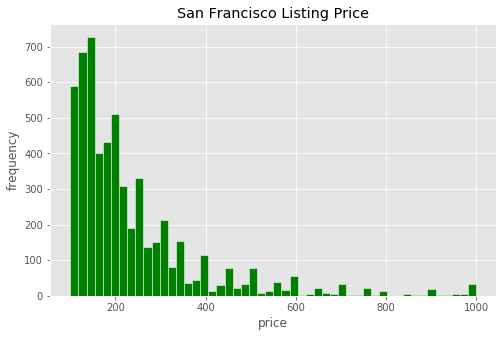

In [116]:
fig, ax = plt.subplots(figsize=(8,5))
a = ax.hist(airbnb.price, bins=50, range=(100,1000), edgecolor='white', color='green')
ax.set_xlabel('price')
ax.set_ylabel('frequency')
ax.set_title('San Francisco Listing Price')

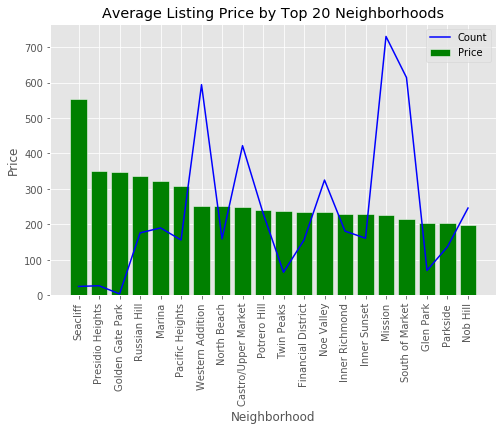

In [117]:
fig, ax = plt.subplots(figsize=(8,5))
a = ax.bar(price_per_neighbourhood.index[:20], height=price_per_neighbourhood.price[:20], edgecolor='white', color='green')
a = ax.plot(listing.index[:20], listing['count'][:20], color='blue', zorder=2)
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Price')
ax.set_title('Average Listing Price by Top 20 Neighborhoods')
ax.set_xticklabels(price_per_neighbourhood.index, rotation=90)
ax.legend(labels=['Count', 'Price'])


Text(0, 0.5, 'Number of People')

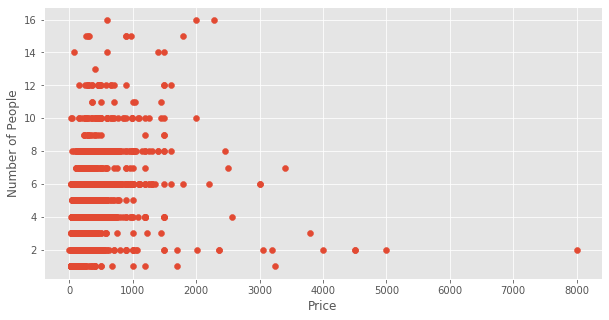

In [123]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(accomm.price, accomm.accommodates)
ax.set_xlabel('Price')
ax.set_ylabel('Number of People')

In [36]:
pass

In [37]:
np.percentile(airbnb.price, 95)

550.0

In [38]:
top95 = airbnb[airbnb.price>550].reset_index()


In [39]:
def compact_names(data):
    name_list=[]
    for line in data:
        name_list.append(line)
    return name_list

In [40]:
top95 = compact_names(top95.name)
def word_dict(x):
    d ={}
    for line in x:
        for word in line.lower().split():
            if word in d:
                d[word] += 1
            else:
                d[word] = 1
    return d


In [41]:
name_dict_top95 = word_dict(top95)
values = []
keys = []
for k,v in name_dict_top95.items():
    values.append(v)
    keys.append(k)
print(keys)

['historic', 'alamo', 'square', 'victorian', 'gorgeous', 'san', 'francisco', 'home', 'luxury', 'summer', 'rental', 'modern', 'architectural', 'gem', '-', '4', 'bdrm', '1600', 'sqft', 'apartment', 'nob', 'hill', 'mini', 'mansion', '4b/4b', 'perfect', 'family', 'home,', '3', 'br', 'in', 'the', 'mission,', 'backyard', '2br', 'north', 'beach', 'for', 'business', 'or', 'leisure', 'large', 'house', 'castro', 'beautiful', '4-bdrm', 'amazing', 'views', 'sf', 'grand', "1880''''s", 'fran', 'potrero', 'paradise', 'with', 'stunning', 'and', 'hot', 'tub', 'location', 'condo!', 'clean', '&', 'spacious', 'noe', 'valley', 'luxurious,', 'high', 'end,', 'modern,', 'remodeled', 'victorian.', 'charming', 'vibrant', "designer''''s", 'loft,', 'downtown/soma', 'near', 'moscone', 'center', 'penthouse', 'condo', 'bay', "fisherman''s", 'wharf', 'centrally', 'located', '4-bedroom', 'view', 'up', 'above', 'castro,', '3+bdrm/2ba', 'gorgeously', 'renovated', 'coastal', 'unique', 'colorful', '+', 'magical', 'garden'

In [42]:
name_top95 = list(zip(values,keys))
sorted((name_top95), reverse=True)

[(81, 'home'),
 (78, 'in'),
 (48, 'with'),
 (48, 'victorian'),
 (36, 'luxury'),
 (35, 'the'),
 (35, 'modern'),
 (34, 'san'),
 (30, 'sf'),
 (30, 'house'),
 (28, 'views'),
 (26, '&'),
 (25, 'of'),
 (25, 'bedroom'),
 (23, 'francisco'),
 (22, 'w/'),
 (22, 'view'),
 (22, 'near'),
 (22, '-'),
 (21, 'suite'),
 (21, 'park'),
 (20, 'heights'),
 (20, 'condo'),
 (19, 'city'),
 (18, 'mission'),
 (18, 'a'),
 (17, 'sunny'),
 (17, 'spacious'),
 (16, 'square'),
 (16, 'apartment'),
 (15, '2'),
 (14, 'noe'),
 (14, 'gate'),
 (14, 'and'),
 (13, 'valley'),
 (13, 'stunning'),
 (13, 'pacific'),
 (13, 'golden'),
 (13, 'flat'),
 (13, 'beautiful'),
 (12, '‚ù§ô∏è'),
 (12, 'private'),
 (11, 'parking'),
 (11, 'marina'),
 (11, 'loft'),
 (11, '3'),
 (10, 'to'),
 (10, 'large'),
 (10, 'hill'),
 (10, 'heart'),
 (10, 'family'),
 (10, 'elegant'),
 (10, 'downtown'),
 (10, 'dolores'),
 (10, 'at'),
 (9, 'soma'),
 (9, 'br'),
 (9, 'bay'),
 (9, '1'),
 (8, '‚≠êô∏è'),
 (8, 'walk'),
 (8, 'union'),
 (8, 'renovated'),
 (8, 'luxurio

In [43]:
rest = airbnb[airbnb.price<550].reset_index()
rest_list = compact_names(rest.name)

In [44]:
def word_dict(x):
    d ={}
    x=str(x)
    for word in x.lower().split():
        if word in d:
            d[word] += 1
        else:
            d[word] = 1
    return d

In [45]:
name_dict_rest = word_dict(rest_list)

In [46]:

values_rest = []
keys_rest = []
for k,v in name_dict_rest.items():
    values_rest.append(v)
    keys_rest.append(k)
print(keys_rest[:20])

["['bright,", 'modern', 'garden', 'unit', '-', "1br/1b',", "'creative", "sanctuary',", "'a", 'friendly', 'room', 'ucsf/usf', 'san', "francisco',", "'friendly", 'apt.', 'style', '-ucsf/usf', "'lovely", '2br']


In [47]:
name_rest = list(zip(values_rest,keys_rest))
sorted((name_rest), reverse=True)[:50]

[(2136, 'in'),
 (863, 'room'),
 (763, 'private'),
 (762, 'with'),
 (596, 'the'),
 (579, 'bedroom'),
 (543, '-'),
 (492, '&'),
 (459, 'of'),
 (459, 'near'),
 (403, 'studio'),
 (368, 'and'),
 (352, "'private"),
 (350, 'w/'),
 (347, 'home'),
 (347, 'by'),
 (335, 'to'),
 (335, 'mission'),
 (316, 'sf'),
 (304, 'victorian'),
 (303, 'san'),
 (296, '1'),
 (275, '1br'),
 (263, '2'),
 (262, 'apartment'),
 (254, 'suite'),
 (251, 'heart'),
 (249, 'garden'),
 (247, 'a'),
 (244, 'valley'),
 (236, 'hill'),
 (232, '|'),
 (205, 'modern'),
 (205, "'spacious"),
 (201, 'union'),
 (196, '+'),
 (195, "'cozy"),
 (193, 'francisco'),
 (193, "'charming"),
 (188, "'modern"),
 (187, 'bath'),
 (179, "'beautiful"),
 (177, "park',"),
 (175, "room',"),
 (173, 'sunny'),
 (170, 'gate'),
 (168, 'noe'),
 (167, 'flat'),
 (166, 'house'),
 (166, "home',")]

In [48]:
coords = airbnb[['neighbourhood_cleansed', 'latitude', 'longitude']]
coords = coords[['neighbourhood_cleansed', 'latitude', 'longitude']].groupby('neighbourhood_cleansed').mean()


In [49]:
pp_ratio = airbnb[['neighbourhood_cleansed', 'price_pp']].groupby('neighbourhood_cleansed').mean()
pp_ratio['count'] = airbnb.neighbourhood_cleansed.value_counts()


In [50]:
p_ratio = airbnb[['neighbourhood_cleansed', 'price']].groupby('neighbourhood_cleansed').mean()
p_ratio['count'] = airbnb.neighbourhood_cleansed.value_counts()





In [51]:
ratio = pd.merge(pp_ratio, coords, left_index=True, right_index=True)


In [52]:
def pets(row):
    if isinstance(row['house_rules'], str):
        if 'no pet' in row['house_rules']:
            row['pets'] = False
        else:
            row['pets'] = True
    else:
        row['pets'] = True
    return row

In [53]:
df1 = airbnb.apply(pets, axis=1)
pets_allowed = df1[df1['pets']==True]
pets_allowed.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,smart_location,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_pp,count,pets
0,958,https://www.airbnb.com/rooms/958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,7/31/08,We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,t,1,1,t,Lower Haight,Western Addition,San Francisco,CA,94117,"San Francisco, CA",United States,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",NaN,170.0,1120.0,4200.0,$100.00,$100.00,2,$25.00,2 months ago,t,1,3,7,92,192,56,7/23/09,5/16/19,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,t,f,moderate,f,f,1,1,0,0,1.60,56.666667,NaN,True
1,5858,https://www.airbnb.com/rooms/5858,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",8904,Philip And Tania,3/2/09,Philip: English transplant to the Bay Area and...,within a day,100%,f,2,2,t,Bernal Heights,Bernal Heights,San Francisco,CA,94110,"San Francisco, CA",United States,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,Family/kid frie...",NaN,235.0,1600.0,5500.0,NaN,$100.00,2,$0.00,3 days ago,t,0,0,0,0,111,0,5/3/09,8/6/17,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90,47.000000,NaN,True
2,7918,https://www.airbnb.com/rooms/7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",Please email your picture id with print name (...,N Juda Muni and bus stop. Street parking.,NaN,NaN,"No party, No smoking, not for any kinds of smo...",21994,Aaron,6/17/09,7 minutes walk to UCSF. 15 minutes walk to US...,within a few hours,100%,f,10,10,t,Cole Valley,Haight Ashbury,San Francisco,CA,94117,"San Francisco, CA",United States,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Free street parking,...",NaN,65.0,485.0,1685.0,$200.00,$50.00,1,$12.00,19 months ago,t,30,60,90,365,17,0,8/31/

In [54]:
pets_allowed.shape


(7372, 78)

In [55]:
pets_allowed.price.mean()

213.97381985892565

In [56]:
pets_not_allowed = df1[df1['pets']==False]


In [57]:
pets_not_allowed.shape

(203, 78)

In [58]:
df3 = price_per_neighbourhood.copy()
df4 = listing.copy()
df4.reset_index(inplace=True)
df4 = df4.rename(columns ={'index': 'neighbourhood_cleansed'})
df4

,neighbourhood_cleansed,price,count
0,Seacliff,552.880000,25
1,Presidio Heights,349.703704,27
2,Golden Gate Park,348.500000,4
3,Russian Hill,337.318182,176
4,Marina,323.726316,190
5,Pacific Heights,309.602564,156
6,Western Addition,252.301347,594
7,North Beach,251.723270,159
8,Castro/Upper Market,248.113744,422
9,Potrero Hill,239.543103,232


In [59]:

avg_price = df3.rename(columns = {'price': 'avg_price'})
avg_price.reset_index(inplace=True)
avg = pd.merge(airbnb, avg_price, on='neighbourhood_cleansed')
avg = pd.merge(airbnb, df4, on='neighbourhood_cleansed')
avg

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,smart_location,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price_x,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_pp,count_x,price_y,count_y
0,958,https://www.airbnb.com/rooms/958,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,1169,Holly,7/31/08,We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,t,1,1,t,Lower Haight,Western Addition,San Francisco,CA,94117,"San Francisco, CA",United States,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",NaN,170.0,1120.0,4200.0,$100.00,$100.00,2,$25.00,2 months ago,t,1,3,7,92,192,56,7/23/09,5/16/19,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,t,f,moderate,f,f,1,1,0,0,1.60,56.666667,NaN,252.301347,594
1,8339,https://www.airbnb.com/rooms/8339,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,NaN,tax ID on file tax ID on file,NaN,Guests have access to everything listed and sh...,NaN,House Manual and House Rules will be provided ...,24215,Rosy,7/2/09,I''''m in Interior Stylist living in SF. \r\n\...,within an hour,100%,f,2,2,t,Alamo Square,Western Addition,San Francisco,CA,94117,"San Francisco, CA",United States,37.77525,-122.43637,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Family/kid f...",NaN,685.0,NaN,NaN,$0.00,$225.00,2,$150.00,2 weeks ago,t,30,60,90,90,27,1,9/25/09,8/11/18,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,moderate,t,t,2,2,0,0,0.23,137.000000,NaN,252.301347,594
2,8567,https://www.airbnb.com/rooms/8567,Lovely 2BR flat Great Location,NaN,"Fully furnished 2BR, 1BA flat in beautiful Vic...","Fully furnished 2BR, 1BA flat in beautiful Vic...","The neighborhood is very centrally located, cl...",NaN,We''''re 2 blocks from several bus lines that ...,NaN,"I am generally here to welcome you, and if not...","No smoking, as I''''m quite allergic. Please p...",25601,Sandy,7/14/09,"We are a family of three who love live music,...",within a day,100%,f,1,1,f,Western Addition/NOPA,Western Addition,San Francisco,CA,94115,"San Francisco, CA",United States,37.78471,-122.44555,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Free parkin...",NaN,255.0,NaN,NaN,$0.00,$125.00,1,$0.00,2 months ago,t,3,7,8,23,34,6,8/14/09,5/19/19,91.0,10.0,8.0,10.0,10.0,10.0,9.0,t,f,f,moderate,f,f,1,1,0,0,0.28,42.500000,NaN,252.3

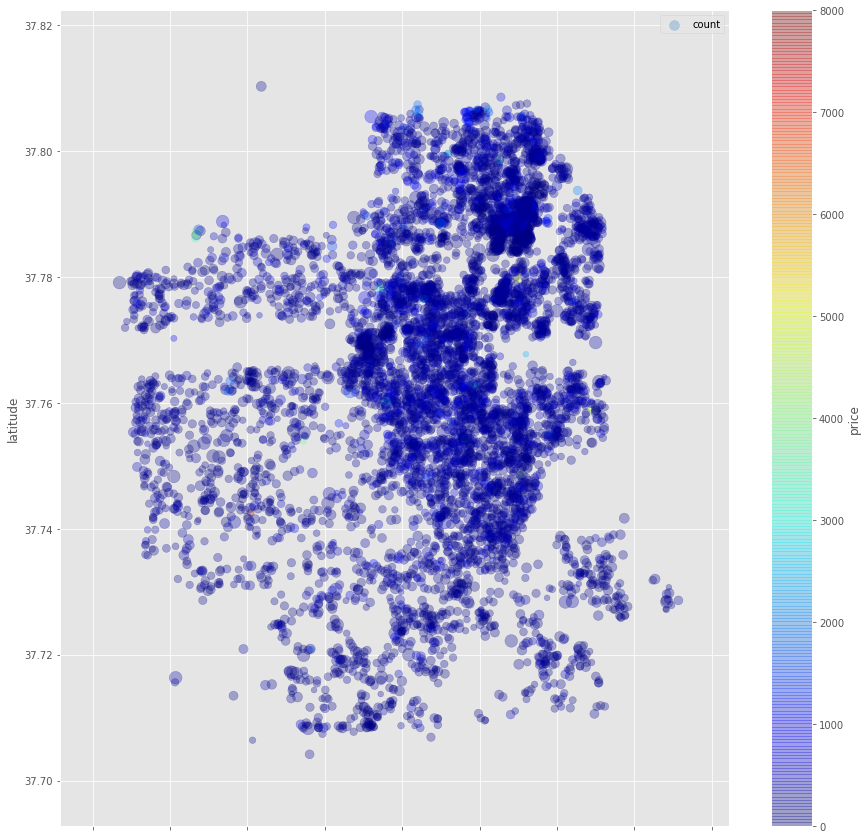

In [60]:
airbnb.plot(kind="scatter", x="longitude", y="latitude",
    s=pp_ratio['price_pp'], label='count',
    c='price', colorbar=True, cmap=plt.get_cmap('jet'), alpha=0.3, figsize=(15,15))
plt.legend()
plt.show()

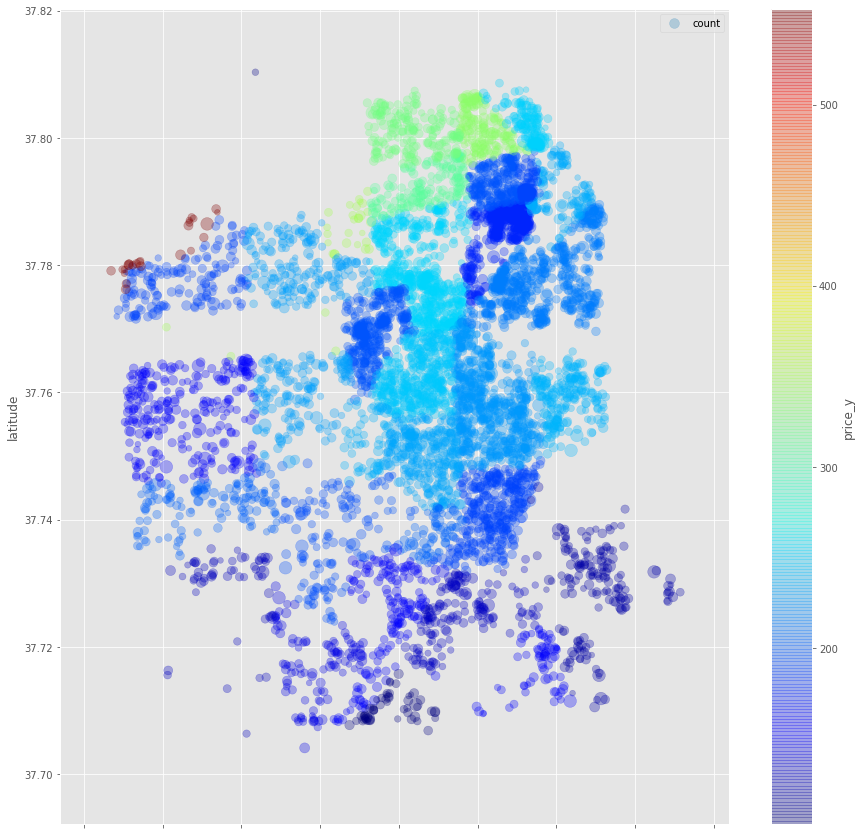

In [61]:
avg.plot(kind="scatter", x="longitude", y="latitude",
    s=pp_ratio['price_pp'], label='count',
    c='price_y', colorbar=True, cmap=plt.get_cmap('jet'), alpha=0.3, figsize=(15,15))
plt.legend()
plt.show()


### Welsh's T-Test 
##### Mission and Noe Valley

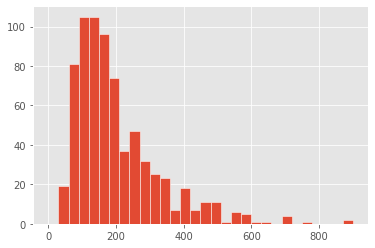

In [62]:
mission = airbnb[(airbnb.neighbourhood_cleansed == 'Mission')]
fig, ax = plt.subplots()
a = ax.hist(mission.price, range=(0,900), bins=30, edgecolor='white')

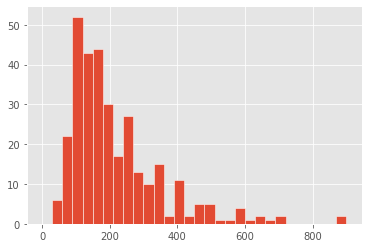

In [63]:
noe_valley = airbnb[(airbnb.neighbourhood_cleansed == 'Noe Valley')]
fig,ax=plt.subplots()
a = ax.hist(noe_valley.price, range=(0,900), bins=30, edgecolor='white')

In [64]:
total_mission_price = mission['price'].sum()
total_noe_price = noe_valley['price'].sum()
total_count = 1055

In [65]:
mission_price = mission.price
noe_price = noe_valley.price


[Text(0, 0, 'Mission'), Text(0, 0, 'Noe Valley')]

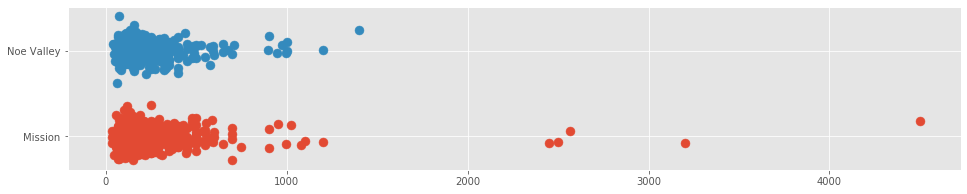

In [66]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(mission_price, np.repeat(0, len(mission_price)) + np.random.normal(0, 0.1, len(mission_price)), s=80)
ax.scatter(noe_price, np.repeat(1, len(noe_price)) + np.random.normal(0, 0.1, len(noe_price)), s=80)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Mission", "Noe Valley"])

In [67]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1)/len(sample_1)) + (np.var(sample_2)/len(sample_2))
    return numerator/np.sqrt(denominator_sq)

In [68]:
test_statistic = welch_test_statistic(mission_price, noe_price)
print('Welch Test Statistic: {:2.2f}'.format(test_statistic))

Welch Test Statistic: -0.55


In [69]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [70]:
df=welch_satterhwaithe_df(mission_price, noe_price)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 904.07


In [71]:
def price_list(x):
    lst = []
    for i in x:
        lst.append(i)
    return lst

In [72]:
mission_price_list= np.array(price_list(mission_price))
noe_price_list=np.array(price_list(noe_price))
m_min, m_max = min(mission_price), max(mission_price)
n_min, n_max = min(noe_price), max(noe_price)
m_min, n_max, n_min, n_max

(33.0, 1400.0, 39.0, 1400.0)

Text(0.5, 1.0, 'p-value Reigon')

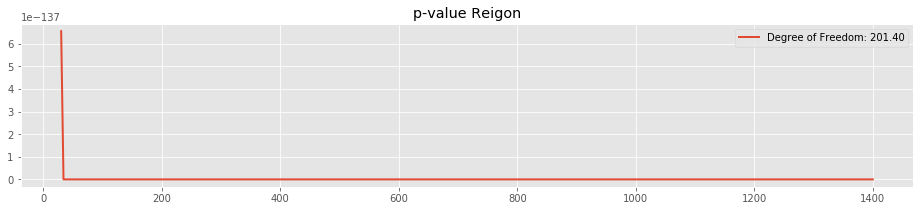

In [106]:
# x = mission_price_list, noe_price_list
# x = np.linspace(30, 1400, num = 347)
# x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
test = stats.t(df)
ax.plot(x, mission_noe.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
# ax.fill_between(x, mission_noe.pdf(x), where=(x>= test_statistic), color='red', alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

In [90]:
test_statistic = welch_test_statistic(noe_price, mission_price)
p_value = 1 - test.cdf(test_statistic)
print("p-value for listing price in Noe Valley is more expensive than Mission: {:2.4f}".format(p_value))

p-value for listing price in Noe Valley is more expensive than Mission: 0.2909


### Mann-Whitney Test

In [91]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [92]:
mission_wins = count_winning_pairs(mission_price, noe_price)
noe_wins = count_winning_pairs(noe_price, mission_price)
print("Number of Mission Wins: {}".format(mission_wins))
print("Number of Noe Valley Wins: {}".format(noe_wins))

Number of Mission Wins: 109719.0
Number of Noe Valley Wins: 127531.0


### Welche's T-Test

##### Inner Sunset vs. Outer Sunset

In [93]:
inner = airbnb[(airbnb.neighbourhood_cleansed == 'Inner Sunset')]
outer = airbnb[(airbnb.neighbourhood_cleansed == 'Outer Sunset')]
inner_price = inner.price
outer_price = outer.price

[Text(0, 0, 'outer Sunset'), Text(0, 0, 'Inner Sunset')]

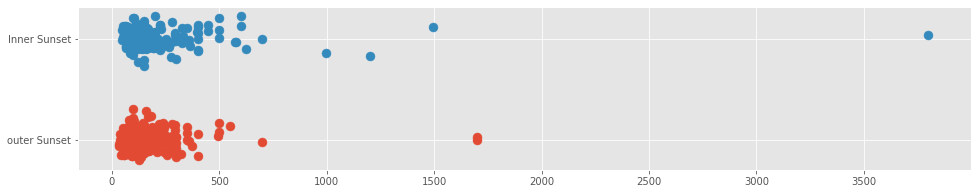

In [94]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(outer_price, np.repeat(0, len(outer_price)) + np.random.normal(0, 0.1, len(outer_price)), s=80)
ax.scatter(inner_price, np.repeat(1, len(inner_price)) + np.random.normal(0, 0.1, len(inner_price)), s=80)
ax.set_yticks([0, 1])
ax.set_yticklabels(["outer Sunset", "Inner Sunset"])

In [95]:
test_statistic = welch_test_statistic(inner_price, outer_price)
print('Welch Test Statistic: {:2.2f}'.format(test_statistic))

Welch Test Statistic: 2.65


In [96]:
df=welch_satterhwaithe_df(inner_price, outer_price)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 201.40


In [97]:
test_statistic = welch_test_statistic(inner_price, outer_price)
p_value = 1 - test.cdf(test_statistic)
print("p-value for listing price in Inner Sunset is more expensive than Outer Sunset: {:2.4f}".format(p_value))


p-value for listing price in Inner Sunset is more expensive than Outer Sunset: 0.0043


### Mann-Whitney

##### Inner Sunset vs Outer Sunset

In [107]:
inner_wins = count_winning_pairs(inner_price, outer_price)
outer_wins = count_winning_pairs(outer_price, inner_price)
print("Number of Inner Sunset Wins: {}".format(inner_wins))
print("Number of Outer Sunset Wins: {}".format(outer_wins))

Number of Inner Sunset Wins: 27040.0
Number of Outer Sunset Wins: 17557.0
